In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Dont focus
from sklearn.datasets import make_blobs

In [5]:
# arr = np.array([1,2,3,4])

# np.save("./arr.npy", arr)
# arr = np.load("./arr.npy")

In [6]:
## Dont focus
X, y = make_blobs(500, centers=3, random_state=0)

In [7]:
X.shape, y.shape

((500, 2), (500,))

In [8]:
np.unique(y)

array([0, 1, 2])

In [31]:
# np.random.choice([1,2,3,4,5,6], size=3, replace=False)

array([5, 3, 4])

In [9]:
train_indexes = np.random.choice(np.arange(0, len(X)), size=int(len(X)*0.8), replace=False)
test_indexes = np.arange(0, len(X))[[i for i in range(0, len(X)) if i not in train_indexes]]

In [10]:
X_train, y_train = X[train_indexes], y[train_indexes]
X_test, y_test = X[test_indexes], y[test_indexes]

In [11]:
# data => shape 500 x 3
# X = data[:, 0:2]
# y = data[:, 2]

In [12]:
features_1 = X_train[:, 0]
features_2 = X_train[:, 1]

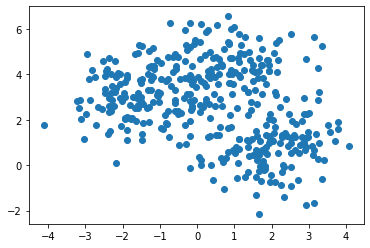

In [13]:
plt.scatter(features_1, features_2)
plt.show()

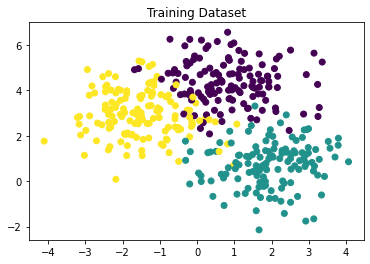

In [19]:
plt.scatter(features_1, features_2, c=y_train)
plt.title("Training Dataset")
plt.show()

In [20]:
X_test.shape

(100, 2)

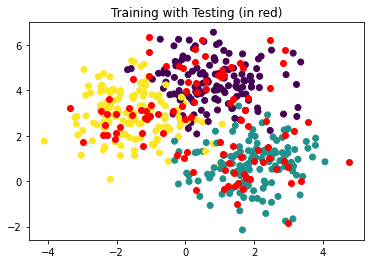

In [21]:
plt.scatter(features_1, features_2, c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c="red")
plt.title("Training with Testing (in red)")
plt.show()

In [38]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def predict_test(X_test, y_test, X_train, y_train, k = 10):
    y_pred = []
    for point in X_test:
        distances = np.linalg.norm(X_train - point, ord=2, axis=1)
        top_indexes = np.argsort(distances)[:k]
        unique, count = np.unique(y_train[top_indexes], return_counts=True)
        y_pred.append(unique[np.argmax(count)])
    
    acc = accuracy(y_test, np.array(y_pred))
    # print("Testing accuracy:", acc)

    return y_pred, acc

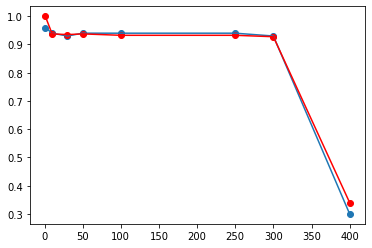

In [46]:
testing_accs = []
training_accs = []
k_values = [1, 10, 30, 50, 100, 250, 300, 400]

for k in k_values:
    _, acc = predict_test(X_test, y_test, X_train, y_train, k=k)
    testing_accs.append(acc)
    _, acc = predict_test(X_train, y_train, X_train, y_train, k=k)
    training_accs.append(acc)




plt.plot(k_values, testing_accs)
plt.scatter(k_values, testing_accs)


plt.plot(k_values, training_accs, color="red")
plt.scatter(k_values, training_accs, color="red")
plt.show()

## Decision Boundary Visualisation

In [80]:
f1, f2 = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

In [81]:
f1, f2= f1.flatten(), f2.flatten()

In [85]:
predictions = []
for i in range(len(f1)):
    predictions.append(predict((f1[i], f2[i]), 10)[0])

plt.scatter(f1, f2, c=predictions)
plt.show()


KeyboardInterrupt: 

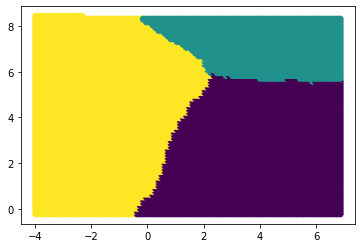

In [88]:
plt.scatter(f1[:len(predictions)], f2[:len(predictions)], c=predictions)
plt.show()

https://colab.research.google.com/drive/1nn0rebiqIakRzbDpkBs1f2ujD--gqAti#scrollTo=QYZGmccsKCWK